In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

In [3]:
%matplotlib qt

### Data Visualization

1. Loading the data from example subject (in this place we will use subject 1)
- eeg data
- annotation data

2. Plotting signal data into the chart using mne plot method.

In [4]:
# Loading the data from 

data = mne.io.read_raw_eeglab('ear_eeg\sub-001\ses-001\eeg\sub-001_ses-001_task-sleep_eeg.set')
channels_list = pd.read_csv('ear_eeg\sub-001\ses-001\eeg\sub-001_ses-001_task-sleep_channels.tsv', sep='\t')
events = pd.read_csv('ear_eeg\sub-001\ses-001\eeg\sub-001_ses-001_task-sleep_acq-scoring_events.tsv', sep='\t')


total_time = data.n_times / data.info['sfreq']
print(f"EEG data have {data.n_times} time points, equal to {total_time/60} minutes --> can be divide into {total_time/30} epochs")
print(f"Events have {len(events)} lengths.")

# check if n_epoch is equal
assert round(total_time/30) == round(len(events)), "eeg data n_epochs not equal to label n_epochs"

Reading c:\Users\tiger\VScode project\eeg_sleep_stage\ear_eeg\sub-001\ses-001\eeg\sub-001_ses-001_task-sleep_eeg.fdt
EEG data have 5557600 time points, equal to 463.1333333333333 minutes --> can be divide into 926.2666666666667 epochs
Events have 926 lengths.


In [5]:
# We need to change the channel mapping (original --> all eeg)

channels_map = {
    'Event': 'misc',
    'C3': 'eeg',
    'C4': 'eeg',
    'O1': 'eeg',
    'O2': 'eeg',
    'A1': 'eeg',
    'A2': 'eeg',
    'F3': 'eeg',
    'F4': 'eeg',
    'ELA': 'eeg', 
    'ELE': 'eeg',
    'ELI': 'eeg', 
    'ELB1': 'eeg', 
    'ELB': 'eeg', 
    'ELG': 'eeg', 
    'ELK': 'eeg',
    'ERA': 'eeg', 
    'ERE': 'eeg',
    'ERI': 'eeg', 
    'ERB1': 'eeg', 
    'ERB': 'eeg', 
    'ERG': 'eeg', 
    'ERK': 'eeg',
    'OSAT': 'misc',
    'CHIN12': 'emg',
    'DIF2': 'syst',
    'DIF3': 'syst',
    'DIF4': 'syst',
    'DC1': 'syst',
    'DC2': 'syst',
    'DC3': 'syst',
    'DC4': 'syst',
    'LOC': 'eog',
    'ROC': 'eog',
    }
data.set_channel_types(channels_map)

C:\Users\tiger\AppData\Local\Temp\ipykernel_18280\2311100282.py:39: RuntimeWarning: The unit for channel(s) DC1, DC2, DC3, DC4, DIF2, DIF3, DIF4, Event, OSAT has changed from V to NA.
  data.set_channel_types(channels_map)


<RawEEGLAB | sub-001_ses-001_task-sleep_eeg.fdt, 34 x 5557600 (27788.0 s), ~50 kB, data not loaded>

In [7]:
# Grouping channels by type
channels_type_group = dict(
scalp_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'A1', 'A2'],
eog_channels = ['LOC', 'ROC'],
lt_ear_channels = ['ELA', 'ELE', 'ELI', 'ELB1', 'ELB', 'ELG', 'ELK'],
rt_ear_channels = ['ERA', 'ERE', 'ERI', 'ERB1', 'ERB', 'ERG', 'ERK'],
osat_channels = ['OSAT'],
emg_channels = ['CHIN12'],
dc_channels = ['DIF2', 'DIF3', 'DIF4', 'DC1', 'DC2', 'DC3', 'DC4'],
)

2. Plotting signal data into the chart

- using mne plot method

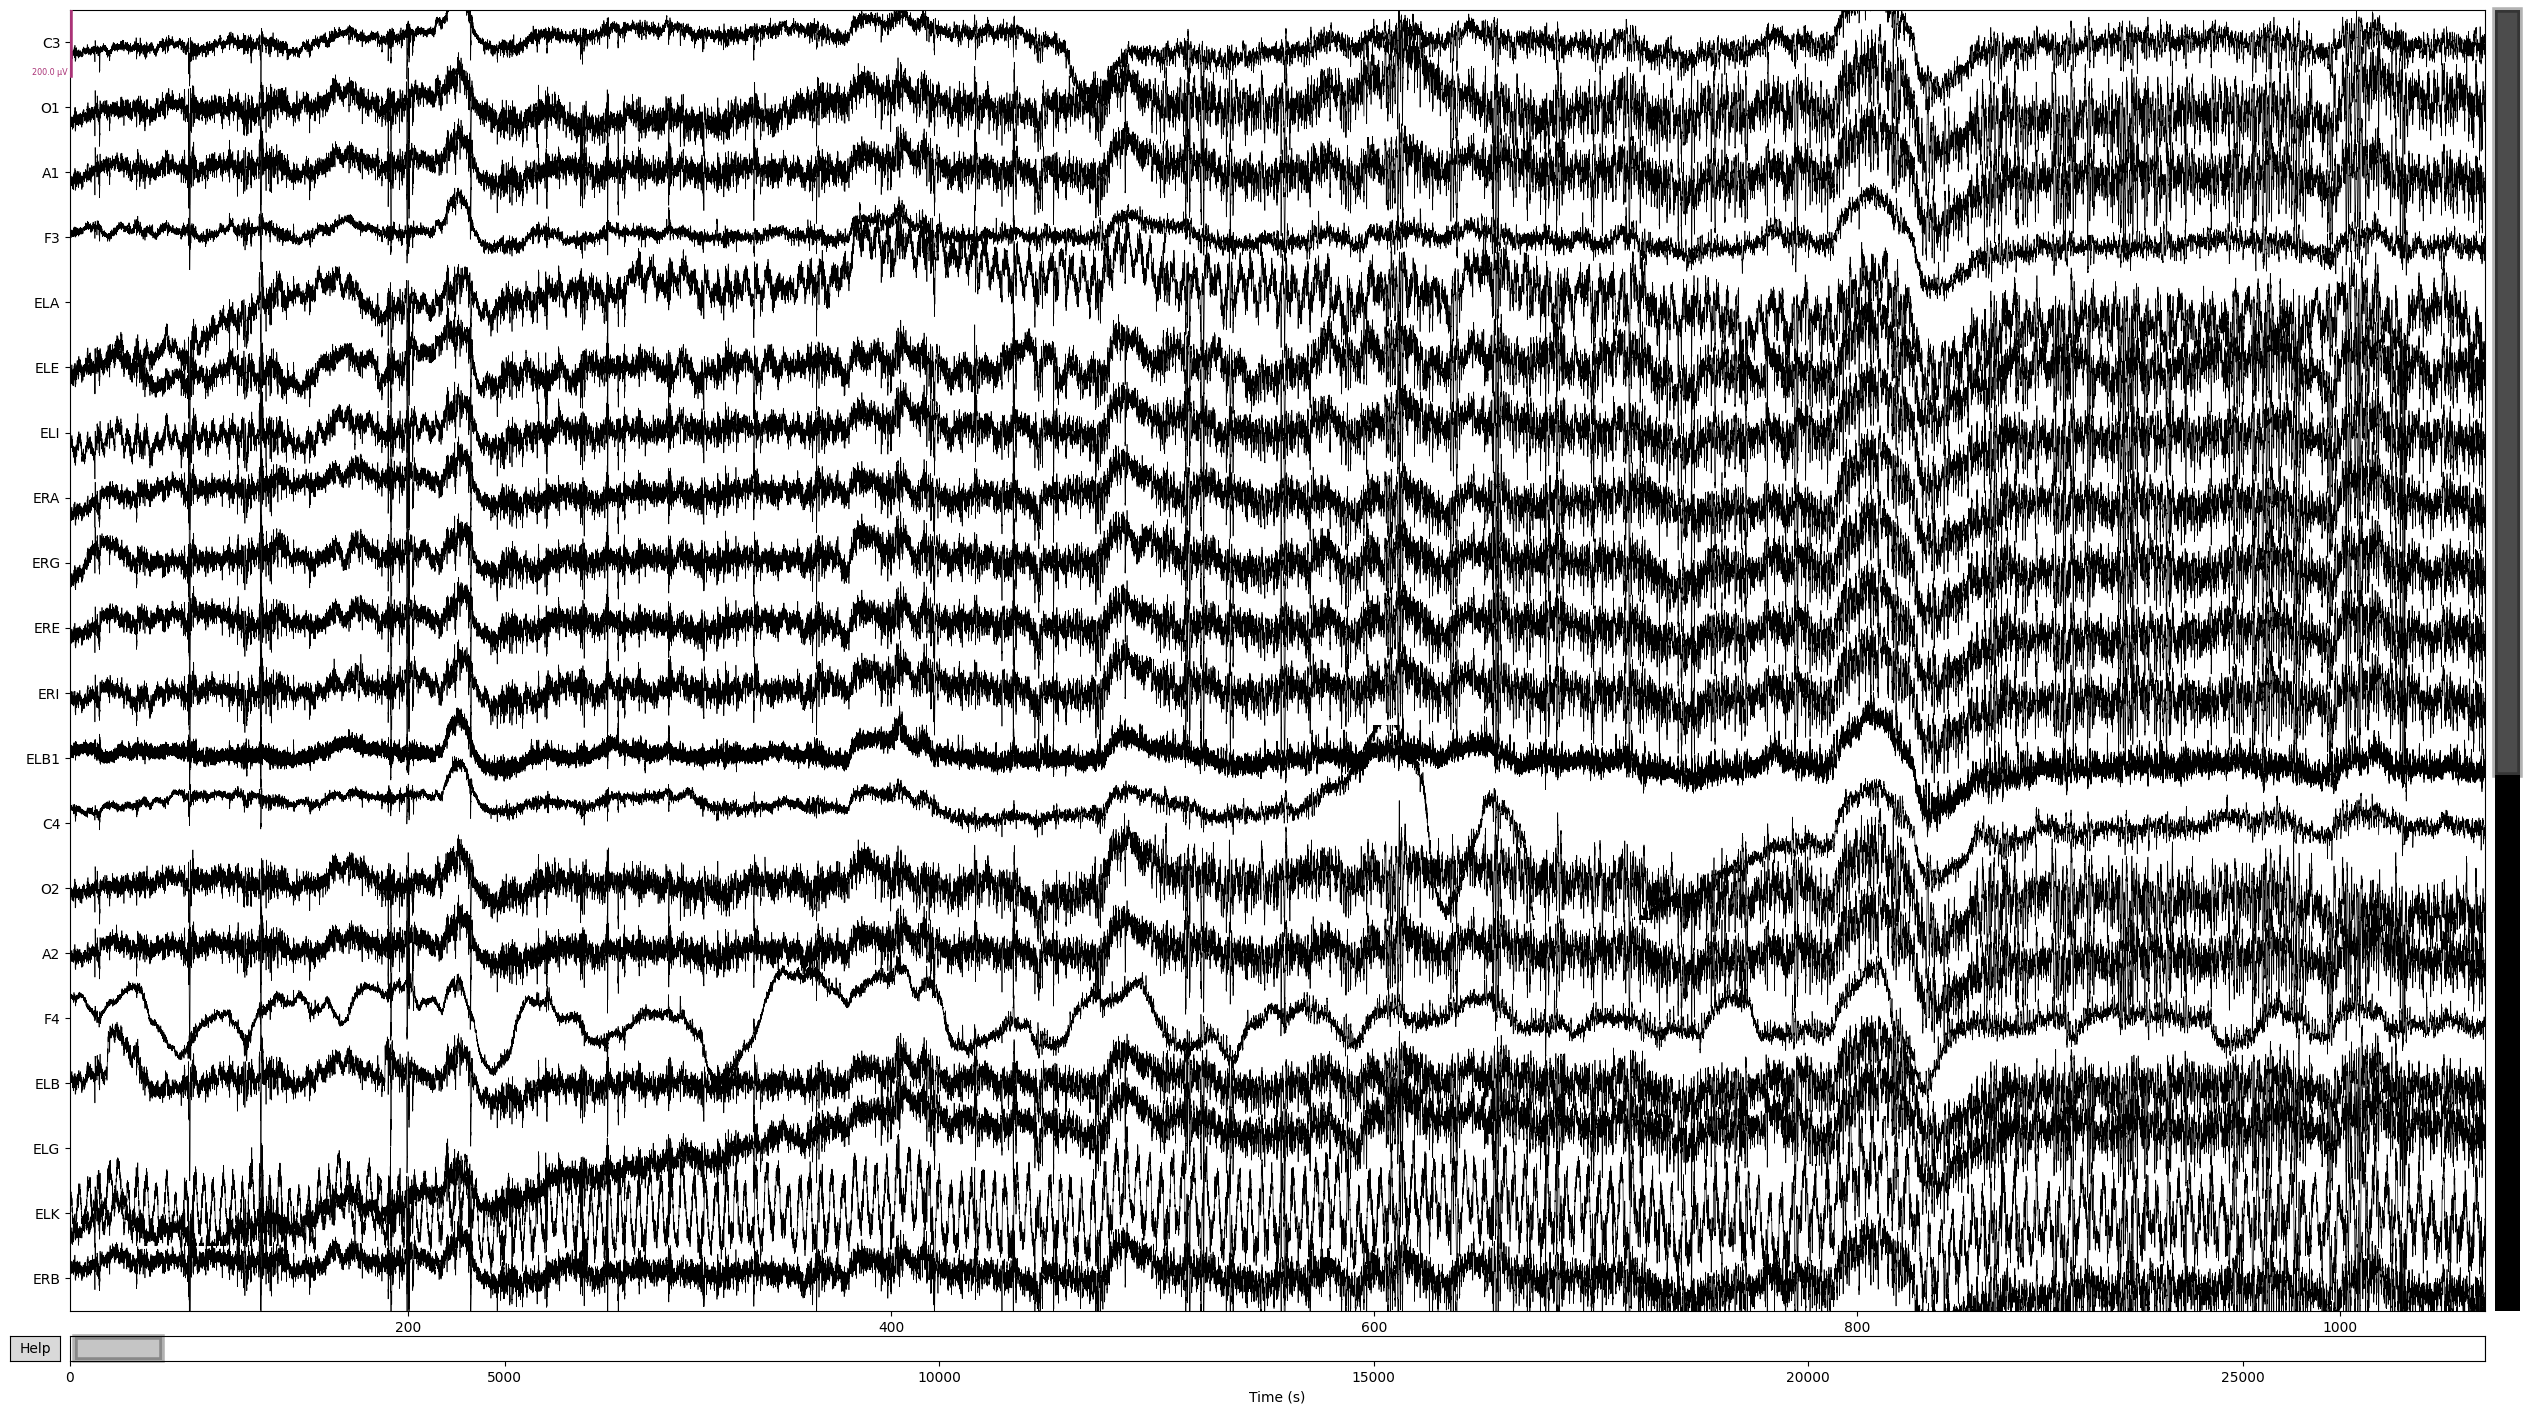

In [9]:
data.plot(start=60, duration=1000, scalings=dict(eeg=1e-4, resp=1e3,eog=1e-4, emg=1e-4, syst=1e-3))

### Visualizing EEG sensor position

In [7]:
scalp_eeg = data.pick(channels_type_group['scalp_channels'])
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
scalp_eeg.set_montage(ten_twenty_montage)

<RawEEGLAB | sub-001_ses-001_task-sleep_eeg.fdt, 8 x 5557600 (27788.0 s), ~18 kB, data not loaded>

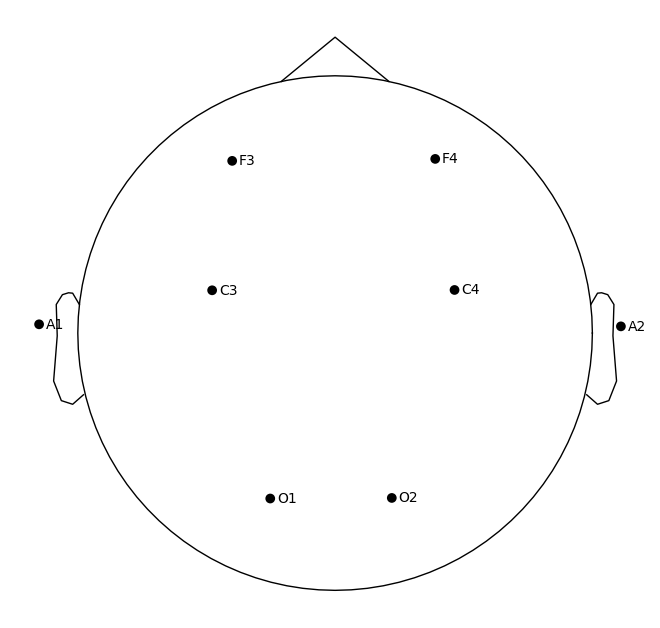

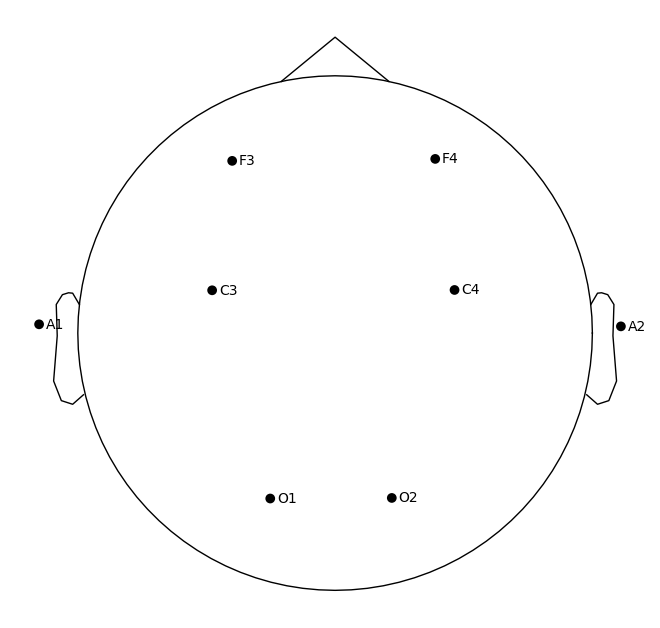

In [8]:
scalp_eeg.plot_sensors(ch_type='eeg', show_names=True)

Effective window size : 10.240 (s)


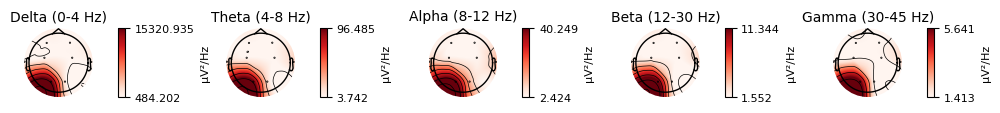

In [9]:
spectrum = scalp_eeg.compute_psd().plot_topomap()

In [19]:
spectrum = scalp_eeg.compute_psd(fmin=0.5, fmax=20)

Effective window size : 10.240 (s)


c:\Users\tiger\miniconda3\envs\eeg_sleep_stage\lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


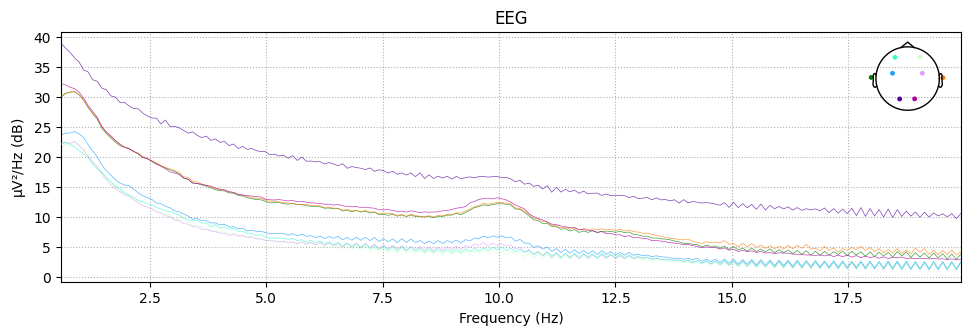

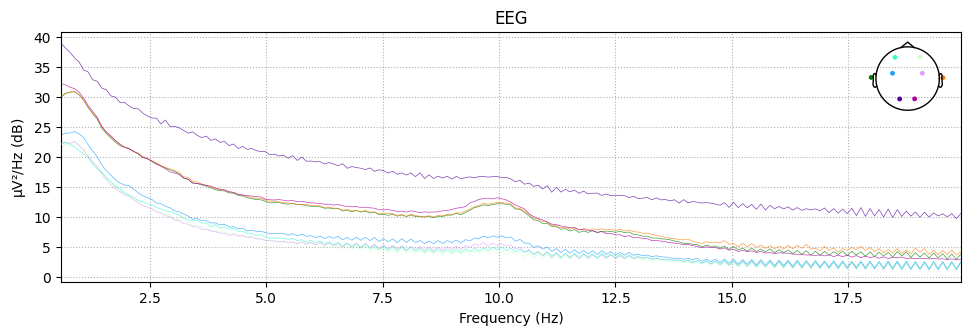

In [20]:
spectrum.plot()

### Working with Hypnogram

In [10]:
events = events.to_numpy()
print('Hypnogram shape is ', events.shape)

Hypnogram shape is  (926, 3)


In [50]:
events.shape

(926, 3)

In [53]:
event_id = {
    'Sleep stage W': 1,
    'Sleep stage 1': 2,
    'Sleep stage 2': 3,
    'Sleep stage 3/4': 4,
    'Sleep stage R': 5
}

fig = mne.viz.plot_events(events, event_id=event_id, 
        sfreq = data.info['sfreq'], first_samp=events[0, 0])
plt.show()

In [54]:
scalp_eeg_epochs = mne.Epochs(raw=scalp_eeg, events=events, event_id=event_id,
                    baseline=None)
scalp_eeg_epochs


Not setting metadata
926 matching events found
No baseline correction applied
0 projection items activated


Number of events,926
Events,Sleep stage 1: 155Sleep stage 2: 25Sleep stage 3/4: 422Sleep stage R: 253Sleep stage W: 71
Time range,-0.200 – 0.500 s
Baseline,off


In [62]:
# keep the color-code for further plotting
stage_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, axs = plt.subplots(ncols=1)

stages = sorted(event_id.keys())

for stage, color in zip(stages, stage_colors):
        spectrum = scalp_eeg_epochs[stage].compute_psd(fmin=0.1, fmax=20.0)
        # spectrum.plot(
        #     ci=None,
        #     color=color,
        #     axes=axs,
        #     show=False,
        #     average=True,
        #     spatial_colors=False,
        #     picks="data",
        #     exclude="bads",
        # )
        spectrum.plot_topo()
axs.set(title='PSD', xlabel="Frequency (Hz)")

Loading data for 155 events and 141 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


ValueError: x and y must have same first dimension, but have shapes (14,) and (8, 14)